# Final Project

Run each cell in the notebook. The explanation of the cells are given on top respectively. 

In [16]:
import numpy as np
import pandas as pd
import random
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import Neural_utils as tu

In [6]:
data = pd.read_csv('data_breast_cancer.csv')
X  = data.iloc[:, 2:-1].values
Y_train = data.iloc[:, 1].values

Y = np.array(Y_train == 'M')
Y = 1*Y    #Setting values to 1 or 0 for training
Y = Y.reshape(569, 1)
X = (X -np.min(X))/(np.max(X)-np.min(X))
print(X.shape, Y.shape)

(569, 30) (569, 1)


Here we construct the layout of our neural network. The h array contains the number of hidden units in each layer and the value l indicates the total no of layers. Also we load the training and testing data. The plot is shown of our training and test data.

In [19]:
h = [30, 50, 20, 5, 1]     #hidden units
l = 5               #total no of layers
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.15) 
print(train_X.shape, train_Y.shape)
total_data = np.concatenate((train_Y, train_X), axis = 1)
train_X = train_X.T
train_Y = train_Y.T
test_X = test_X.T
test_Y = test_Y.T

print(train_X.shape, train_Y.shape)


(483, 30) (483, 1)
(30, 483) (1, 483)


# Deep Neural Network Unregularized

Here we construct the deep neural network. This network doesn't involve any regularization or optimization. Three different learning rates are selected and the results are printed. For metrics, all of accuracy, precision, recall and f score are shown.

Epoch: 0
Epoch: 5000
Epoch: 10000
Epoch: 15000
Epoch: 20000
Epoch: 25000
Epoch: 30000
Epoch: 35000
Epoch: 40000
Epoch: 45000
Epoch: 50000
Learning Rate: 0.001
Training
Accuracy: 90.47619047619048 %  Precision: 92.07317073170732 %  Recall: 82.06521739130434 %  F Score: 86.7816091954023 %
Testing
Accuracy: 91.86046511627907 %  Precision 88.88888888888889 %  Recall: 85.71428571428571 %  F Score: 87.27272727272727 %


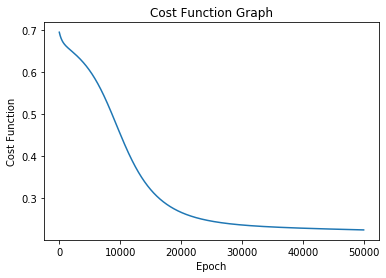

Epoch: 0
Epoch: 5000
Epoch: 10000
Epoch: 15000
Epoch: 20000
Epoch: 25000
Epoch: 30000
Epoch: 35000
Epoch: 40000
Epoch: 45000
Epoch: 50000
Learning Rate: 0.1
Training
Accuracy: 93.16770186335404 %  Precision: 98.08917197452229 %  Recall: 83.69565217391305 %  F Score: 90.32258064516128 %
Testing
Accuracy: 94.18604651162791 %  Precision 100.0 %  Recall: 82.14285714285714 %  F Score: 90.19607843137256 %


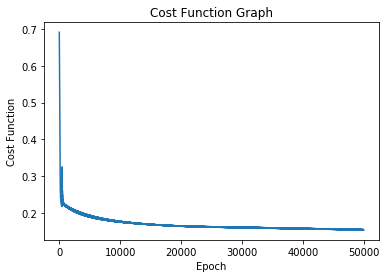

Epoch: 0
Epoch: 5000
Epoch: 10000
Epoch: 15000
Epoch: 20000
Epoch: 25000
Epoch: 30000
Epoch: 35000
Epoch: 40000
Epoch: 45000
Epoch: 50000
Learning Rate: 0.8
Training
Accuracy: 94.40993788819875 %  Precision: 91.97860962566845 %  Recall: 93.47826086956522 %  F Score: 92.72237196765498 %
Testing
Accuracy: 93.02325581395348 %  Precision 84.375 %  Recall: 96.42857142857143 %  F Score: 89.99999999999999 %


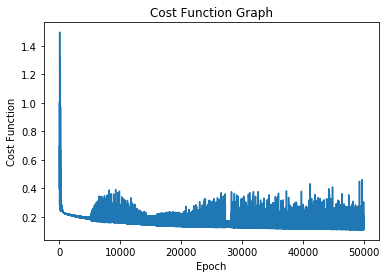

In [20]:
def neural_net():
    n, m = train_X.shape
    alpha_arr = [0.001, 0.1, 0.8]
    W = [None]*(l-1)
    b = [None]*(l-1)
    A = [None]*(l)
    dW =  [None]*(l-1)
    db = [None]*(l-1)
    dZ = [None]*(l-1)
    Z = [None]*(l)
    A[0] = train_X
    cost_array = []
    J_arr =[]
    epochs = 50001
    count = 0
    for alpha in alpha_arr:
        cost_array = []
        J_arr =[]
        count = 0
        for k in range(l-1):
            W[k] = np.random.randn(h[k+1],h[k])/np.sqrt(h[k])     #Initializing W and b
            b[k] = np.random.rand(h[k+1], 1)*0.0
        for j in range(epochs):
            if(j%5000 == 0):
                print('Epoch:', j)
            for k in range(l-2):
                A[k+1], Z[k+1] = tu.forward_prop_hidden(W[k], b[k], A[k])         #forward propagation through hidden layer  
            A[l-1] =  tu.forward_prop_output(W[l-2], b[l-2], A[l-2])     #forward propagation through output layer         

            (dW[l-2], db[l-2], dZ[l-2]) = tu.backward_prop_2(A[l-1], A[l-2], m, train_Y)  #backpropagation through output layer
            for k in reversed(range(l-2)):
                (dW[k], db[k], dZ[k]) = tu.backward_prop_1(A[k+1], m, W[k+1], dZ[k+1], Z[k+1], A[k]) #backpropagation through hidden layer

            for k in range(l-1):
                W[k] = W[k] - alpha*dW[k]
                b[k] = b[k] - alpha*db[k]       #Updating b and W

            total_cost = tu.cost_function(A[l-1], m, train_Y)
            cost_array.append(total_cost)    # Storing the value of cost function
            J_arr.append(count)
            count+= 1
        print('Learning Rate:', alpha)
        final_accuracy_test, precision_test, recall_test, fscore_test = tu.results(W, b, test_X, test_Y, l)    # Calculating the training and test accuracy
        final_accuracy_train, precision_train, recall_train, fscore_train = tu.results(W, b, train_X, train_Y, l)
        print('Training')
        print('Accuracy:', str(final_accuracy_train),'%  Precision:', str(precision_train), '%  Recall:', str(recall_train),'%  F Score:', str(fscore_train),'%')
        print('Testing')
        print('Accuracy:', str(final_accuracy_test),'%  Precision', str(precision_test), '%  Recall:', str(recall_test),'%  F Score:', str(fscore_test),'%')

        tu.cost_graph(J_arr, cost_array)
neural_net()

# Using L2 Regularization

Here we construct the deep neural network with Regularization. This network involves L2 regularization. Different lambda values are selected and the results are printed. For metrics, all of accuracy, precision, recall and f score are shown.

Epoch: 0
Epoch: 10000
Epoch: 20000
Epoch: 30000
Epoch: 40000
Epoch: 50000
Lambda: 0.3
Training
Accuracy: 93.7888198757764 %  Precision: 94.76744186046511 %  Recall: 88.58695652173914 %  F Score: 91.57303370786516 %
Testing
Accuracy: 93.02325581395348 %  Precision 86.66666666666667 %  Recall: 92.85714285714286 %  F Score: 89.65517241379311 %


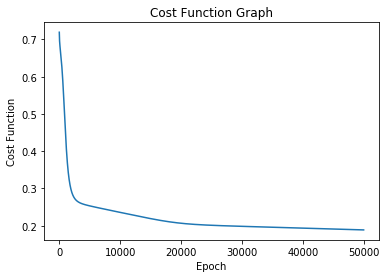

Epoch: 0
Epoch: 10000
Epoch: 20000
Epoch: 30000
Epoch: 40000
Epoch: 50000
Lambda: 0.9
Training
Accuracy: 93.37474120082815 %  Precision: 94.70588235294117 %  Recall: 87.5 %  F Score: 90.96045197740112 %
Testing
Accuracy: 91.86046511627907 %  Precision 86.20689655172413 %  Recall: 89.28571428571429 %  F Score: 87.71929824561403 %


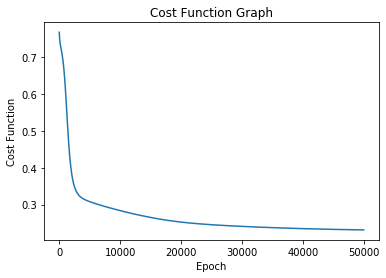

In [23]:
def neural_net_L2():
    n, m = train_X.shape
    lambda_arr = [0.3, 0.9]
    alpha = 0.01
    W = [None]*(l-1)
    b = [None]*(l-1)
    A = [None]*(l)
    dW = [None]*(l-1)
    db = [None]*(l-1)
    dZ = [None]*(l-1)
    Z = [None]*(l)
    A[0] = train_X
    cost_array = []
    J_arr =[]
    epochs = 50001
    count = 0
    for lambda1 in lambda_arr:
        cost_array = []
        J_arr =[]
        count = 0
        for k in range(l-1):
            W[k] = np.random.randn(h[k+1],h[k])/np.sqrt(h[k])     #Initializing W and b
            b[k] = np.random.rand(h[k+1], 1)*0.0
        for j in range(epochs):
            if(j%10000 == 0):
                print('Epoch:', j)
            for k in range(l-2):
                A[k+1], Z[k+1] = tu.forward_prop_hidden(W[k], b[k], A[k])         #forward propagation through hidden layer  
            A[l-1] =  tu.forward_prop_output(W[l-2], b[l-2], A[l-2])     #forward propagation through output layer         

            (dW[l-2], db[l-2], dZ[l-2]) = tu.backward_prop_2(A[l-1], A[l-2], m, train_Y)  #backpropagation through output layer
            for k in reversed(range(l-2)):
                (dW[k], db[k], dZ[k]) = tu.backward_prop_1_L2(A[k+1], m, W[k+1], dZ[k+1], Z[k+1], A[k], lambda1, W[k]) #backpropagation through hidden layer
            total_cost = tu.cost_function_L2(A[l-1], m, train_Y, W, lambda1, l)
            for k in range(l-1):
                W[k] = W[k] - alpha*dW[k]
                b[k] = b[k] - alpha*db[k]       #Updating b and W


            cost_array.append(total_cost)    # Storing the value of cost function
            J_arr.append(count)
            count+= 1
        print('Lambda:', lambda1)
        final_accuracy_test, precision_test, recall_test, fscore_test = tu.results(W, b, test_X, test_Y, l)    # Calculating the training and test accuracy
        final_accuracy_train, precision_train, recall_train, fscore_train = tu.results(W, b, train_X, train_Y, l)
        print('Training')
        print('Accuracy:', str(final_accuracy_train),'%  Precision:', str(precision_train), '%  Recall:', str(recall_train),'%  F Score:', str(fscore_train),'%')
        print('Testing')
        print('Accuracy:', str(final_accuracy_test),'%  Precision', str(precision_test), '%  Recall:', str(recall_test),'%  F Score:', str(fscore_test),'%')


        tu.cost_graph(J_arr, cost_array)
neural_net_L2()

#  Dropout

Here we construct the deep neural network with dropout. Various keep probabilities are selected and the results are printed. For metrics, all of accuracy, precision, recall and f score are shown.

Epoch: 0
Epoch: 10000
Epoch: 20000
Epoch: 30000
Epoch: 40000
Epoch: 50000
Keep Probability: 0.7
Training
Accuracy: 92.7536231884058 %  Precision: 98.06451612903226 %  Recall: 82.6086956521739 %  F Score: 89.67551622418878 %
Testing
Accuracy: 94.18604651162791 %  Precision 100.0 %  Recall: 82.14285714285714 %  F Score: 90.19607843137256 %


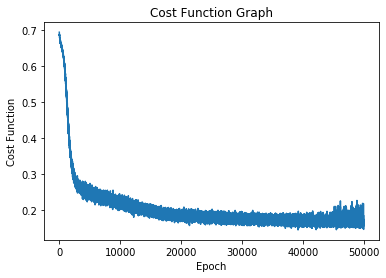

Epoch: 0
Epoch: 10000
Epoch: 20000
Epoch: 30000
Epoch: 40000
Epoch: 50000
Keep Probability: 0.3
Training
Accuracy: 87.5776397515528 %  Precision: 100.0 %  Recall: 67.3913043478261 %  F Score: 80.51948051948052 %
Testing
Accuracy: 91.86046511627907 %  Precision 100.0 %  Recall: 75.0 %  F Score: 85.71428571428571 %


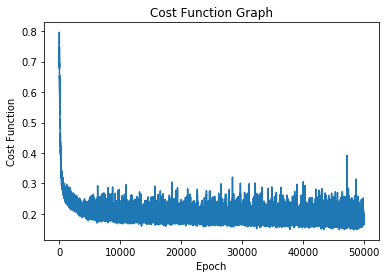

In [25]:
def neural_net_drop():
    n, m = train_X.shape
    alpha = 0.01
    W = [None]*(l-1)
    b = [None]*(l-1)
    A = [None]*(l)
    D = [None]*(l-2)
    dW = [None]*(l-1)
    db = [None]*(l-1)
    dZ = [None]*(l-1)
    Z = [None]*(l)
    A[0] = train_X
    keep_prob_arr = [0.7, 0.3]
    cost_array = []
    J_arr =[]
    epochs = 50001
    count = 0
    for keep_prob in keep_prob_arr:
        cost_array = []
        J_arr =[]
        count = 0
        for k in range(l-1):
            W[k] = np.random.randn(h[k+1],h[k])/np.sqrt(h[k])     #Initializing W and b
            b[k] = np.random.rand(h[k+1], 1)*0
        for j in range(epochs):
            if(j%10000 == 0):
                print('Epoch:', j)
            for k in range(l-2):
                D[k] = np.random.randn(h[k+1], m)
                D[k] = D[k]<keep_prob
            for k in range(l-2):
                A[k+1], Z[k+1] = tu.forward_prop_hidden_Drop(W[k], b[k], A[k], D[k], keep_prob)         #forward propagation through hidden layer
            A[l-1] =  tu.forward_prop_output(W[l-2], b[l-2], A[l-2])     #forward propagation through output layer         

            (dW[l-2], db[l-2], dZ[l-2]) = tu.backward_prop_2(A[l-1], A[l-2], m, train_Y)  #backpropagation through output layer
            for k in reversed(range(l-2)):
                (dW[k], db[k], dZ[k]) = tu.backward_prop_1_Drop(A[k+1], m, W[k+1], dZ[k+1], Z[k+1], A[k], D[k], keep_prob) #backpropagation through hidden layer

            for k in range(l-1):
                W[k] = W[k] - alpha*dW[k]
                b[k] = b[k] - alpha*db[k]       #Updating b and W

            total_cost = tu.cost_function(A[l-1], m, train_Y)
            cost_array.append(total_cost)    # Storing the value of cost function
            J_arr.append(count)
            count+= 1
        print('Keep Probability:',keep_prob)
        final_accuracy_test, precision_test, recall_test, fscore_test = tu.results(W, b, test_X, test_Y, l)    # Calculating the training and test accuracy
        final_accuracy_train, precision_train, recall_train, fscore_train = tu.results(W, b, train_X, train_Y, l)
        print('Training')
        print('Accuracy:', str(final_accuracy_train),'%  Precision:', str(precision_train), '%  Recall:', str(recall_train),'%  F Score:', str(fscore_train),'%')
        print('Testing')
        print('Accuracy:', str(final_accuracy_test),'%  Precision', str(precision_test), '%  Recall:', str(recall_test),'%  F Score:', str(fscore_test),'%')


        tu.cost_graph(J_arr, cost_array)
neural_net_drop()

# Adam Optimization

Here we construct the deep neural network with optimization. This network involves Adam Optimizer. Various different combination of Beta1 and Beta 2 are selected and the results are printed. For metrics, all of accuracy, precision, recall and f score are shown.

Beta1: 0.9 Beta2: 0.999
Training
Accuracy: 100.0 %  Precision: 100.0 %  Recall: 100.0 %  F Score: 100.0 %
Testing
Accuracy: 97.67441860465115 %  Precision 100.0 %  Recall: 92.85714285714286 %  F Score: 96.2962962962963 %


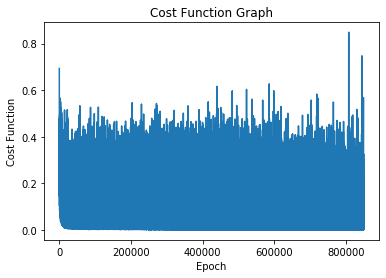

C:\Users\Bikram Kumar De\Neural_utils.py:73: RuntimeWarning: overflow encountered in square
  ans = 1/np.square(np.cosh(x))
C:\Users\Bikram Kumar De\Neural_utils.py:73: RuntimeWarning: overflow encountered in cosh
  ans = 1/np.square(np.cosh(x))


Beta1: 0.9 Beta2: 0.6
Training
Accuracy: 100.0 %  Precision: 100.0 %  Recall: 100.0 %  F Score: 100.0 %
Testing
Accuracy: 97.67441860465115 %  Precision 93.33333333333333 %  Recall: 100.0 %  F Score: 96.55172413793103 %


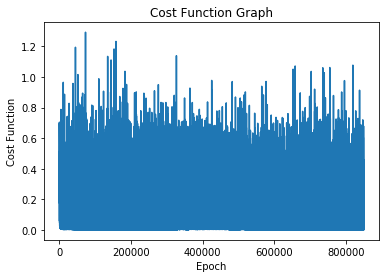

Beta1: 0.9 Beta2: 0.01
Training
Accuracy: 57.14285714285714 %  Precision: 0.0 %  Recall: 0.0 %  F Score: 0.0 %
Testing
Accuracy: 67.44186046511628 %  Precision 0.0 %  Recall: 0.0 %  F Score: 0.0 %


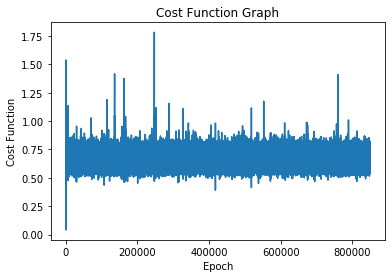

Beta1: 0.5 Beta2: 0.999
Training
Accuracy: 100.0 %  Precision: 100.0 %  Recall: 100.0 %  F Score: 100.0 %
Testing
Accuracy: 96.51162790697676 %  Precision 90.32258064516128 %  Recall: 100.0 %  F Score: 94.91525423728812 %


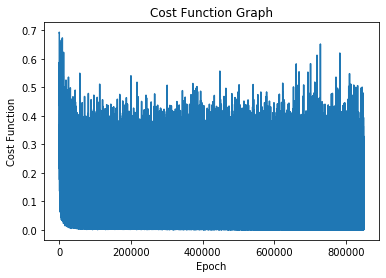

Beta1: 0.5 Beta2: 0.6
Training
Accuracy: 96.42857142857143 %  Precision: 100.0 %  Recall: 92.3076923076923 %  F Score: 96.00000000000001 %
Testing
Accuracy: 96.51162790697676 %  Precision 90.32258064516128 %  Recall: 100.0 %  F Score: 94.91525423728812 %


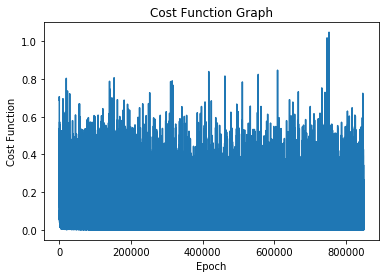

Beta1: 0.5 Beta2: 0.01
Training
Accuracy: 100.0 %  Precision: 100.0 %  Recall: 100.0 %  F Score: 100.0 %
Testing
Accuracy: 94.18604651162791 %  Precision 84.84848484848484 %  Recall: 100.0 %  F Score: 91.80327868852459 %


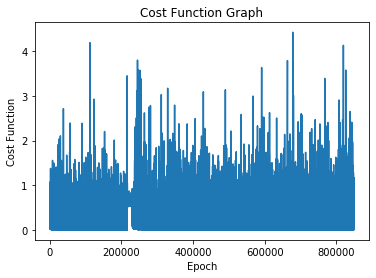

Beta1: 0.1 Beta2: 0.999
Training
Accuracy: 92.85714285714286 %  Precision: 94.11764705882352 %  Recall: 94.11764705882352 %  F Score: 94.11764705882352 %
Testing
Accuracy: 96.51162790697676 %  Precision 93.10344827586206 %  Recall: 96.42857142857143 %  F Score: 94.73684210526316 %


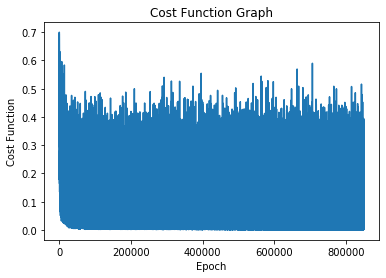

Beta1: 0.1 Beta2: 0.6
Training
Accuracy: 100.0 %  Precision: 100.0 %  Recall: 100.0 %  F Score: 100.0 %
Testing
Accuracy: 96.51162790697676 %  Precision 90.32258064516128 %  Recall: 100.0 %  F Score: 94.91525423728812 %


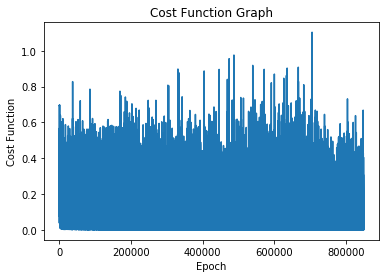

Beta1: 0.1 Beta2: 0.01
Training
Accuracy: 100.0 %  Precision: 100.0 %  Recall: 100.0 %  F Score: 100.0 %
Testing
Accuracy: 98.83720930232558 %  Precision 96.55172413793103 %  Recall: 100.0 %  F Score: 98.24561403508771 %


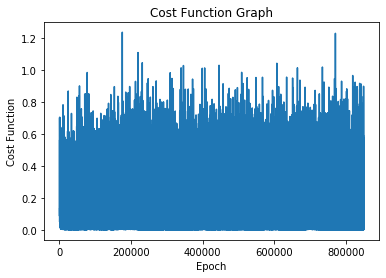

In [26]:
def adam():
    alpha = 0.001
    beta1_arr = [0.9, 0.5, 0.1]
    beta2_arr = [0.999, 0.6, 0.01]
    delta = 0.00000001
    W = [None]*(l-1)
    b = [None]*(l-1)
    VdW = [None]*(l-1)
    Vdb = [None]*(l-1)
    SdW = [None]*(l-1)
    Sdb = [None]*(l-1)
    v_dW = [None]*(l-1)
    v_db = [None]*(l-1)
    s_dW = [None]*(l-1)
    s_db = [None]*(l-1)
    A = [None]*(l)
    dW = [None]*(l-1)
    db = [None]*(l-1)
    dZ = [None]*(l-1)
    Z = [None]*(l)
    cost_array = []
    J_arr =[]
    epochs = 50001
    count = 0
    for beta1 in beta1_arr:
        for beta2 in beta2_arr:
            cost_array = []
            J_arr =[]
            count = 0
            for k in range(l-1):
                W[k] = np.random.randn(h[k+1],h[k])/np.sqrt(h[k])     #Initializing parameters
                b[k] = np.random.rand(h[k+1], 1)*0.0
                VdW[k] = np.random.rand(h[k+1],h[k])*0.0
                Vdb[k] = np.random.rand(h[k+1], 1)*0.0
                SdW[k] = np.random.rand(h[k+1],h[k])*0.0
                Sdb[k] = np.random.rand(h[k+1], 1)*0.0
                v_dW[k] = np.random.rand(h[k+1],h[k])*0.0
                v_db[k] = np.random.rand(h[k+1], 1)*0.0
                s_dW[k] = np.random.rand(h[k+1],h[k])*0.0
                s_db[k] = np.random.rand(h[k+1], 1)*0.0
            for epoch in range(epochs):
#                 if(epoch%10000 == 0):
#                     print('Epoch:', epoch)
                np.random.shuffle(total_data)
                split_data = np.array_split(total_data, (569/32))   #set the number of batches
                minibatch_count = 0
                t = 0
                for minibatch in split_data:
#                     if (epoch%50 == 0 and minibatch_count %200 ==0):
#                         print('Batch Count:', minibatch_count)
                    minibatch_count += 1
                    X = np.array(minibatch[:,1:])
                    Y = np.array(minibatch[:,0])        #selecting data and truth values of minibatches
                    train_X = X.T
                    train_Y = Y.T
                    n, m = train_X.shape
                    A[0] = train_X
                    for k in range(l-2):
                        A[k+1], Z[k+1] = tu.forward_prop_hidden(W[k], b[k], A[k])         #forward propagation through hidden layer  
                    A[l-1] =  tu.forward_prop_output(W[l-2], b[l-2], A[l-2])     #forward propagation through output layer         

                    (dW[l-2], db[l-2], dZ[l-2]) = tu.backward_prop_2(A[l-1], A[l-2], m, train_Y)  #backpropagation through output layer
                    for k in reversed(range(l-2)):
                        (dW[k], db[k], dZ[k]) = tu.backward_prop_1(A[k+1], m, W[k+1], dZ[k+1], Z[k+1], A[k]) #backpropagation through hidden layer
                    t = t+1
                    for k in range(l-1):
                        VdW[k] = beta1*VdW[k] + (1-beta1)*dW[k]   #Using velocity and momentum
                        Vdb[k] = beta1*Vdb[k] + (1-beta1)*db[k]
                        SdW[k] = beta2*SdW[k] + (1-beta2)*dW[k]*dW[k]
                        Sdb[k] = beta2*Sdb[k] + (1-beta2)*db[k]*db[k]
                        v_dW[k] = VdW[k]/(1-(beta1**t))
                        v_db[k] = Vdb[k]/(1-(beta1**t))
                        s_dW[k] = SdW[k]/(1-(beta2**t))
                        s_db[k] = Sdb[k]/(1-(beta2**t))
                        W[k] = W[k] - alpha*v_dW[k]/(np.sqrt(s_dW[k])+delta)
                        b[k] = b[k] - alpha*v_db[k]/(np.sqrt(s_db[k])+delta)       #Updating b and W

                    total_cost = tu.cost_function(A[l-1], m, train_Y)
                    cost_array.append(total_cost)    # Storing the value of cost function
                    J_arr.append(count)
                    count+= 1
            print('Beta1:', beta1, 'Beta2:', beta2)
            final_accuracy_test, precision_test, recall_test, fscore_test = tu.results(W, b, test_X, test_Y, l)    # Calculating the training and test accuracy
            final_accuracy_train, precision_train, recall_train, fscore_train = tu.results(W, b, train_X, train_Y, l)
            print('Training')
            print('Accuracy:', str(final_accuracy_train),'%  Precision:', str(precision_train), '%  Recall:', str(recall_train),'%  F Score:', str(fscore_train),'%')
            print('Testing')
            print('Accuracy:', str(final_accuracy_test),'%  Precision', str(precision_test), '%  Recall:', str(recall_test),'%  F Score:', str(fscore_test),'%')

            tu.cost_graph(J_arr, cost_array)
adam()

All the results are shown here. The explanation of results and their analysis are provided in the attached report